In [19]:
import os

from binance.client import Client

from time import sleep
import matplotlib.pyplot as plt
import time
from binance import ThreadedWebsocketManager
import csv
import pandas as pd
from binance.enums import *
from importlib import reload
import importlib
from binance.exceptions import BinanceAPIException, BinanceOrderException
import warnings
warnings.filterwarnings('ignore')

In [207]:
import urllib.request
import json
import urllib
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import time
import numpy as np
import statsmodels.api as sm
import random
from joblib import Parallel, delayed
from binance.enums import *
import optuna

In [208]:
binance_api='icjpRWWRr15yIC1eEXXDB9nRQXCbCCsBltjr5akAozIfeT0i1nVN1gu8BbkLatTY'
binance_secret='xjsyRkZmYkr6GTOnYoppgfl5z6HYxPpz7f0s6RxWBgCh99BsmOGsmKca5W7wetqS'

In [209]:
client = Client(binance_api, binance_secret)

In [210]:
bars = client.get_historical_klines('BTCUSDT', '1m',"2 Jan, 2021 00:00:00", limit=1000)
for line in bars:
    del line[6:]

ddf = pd.DataFrame(bars, columns=['date', 'open', 'high', 'low', 'close','vol'])
ddf=ddf.astype(float)
ddf['change']=ddf['close']-ddf['open']
ddf['candlelen']=ddf['high']-ddf['low']

In [211]:
df=ddf
len(df)

1733676

In [212]:
directory=r'C:\Users\Administrator\Desktop\量化\binance\binance_jupyter\tech'
signal_list=os.listdir(directory)
signal_list=[signal for signal in signal_list if signal[-2:]=="py"]

In [213]:
signal_list.remove('Rccd.py')

In [ ]:
for signal in signal_list:
    full_module_name=signal[:-3]
    mymodule=importlib.import_module(full_module_name)
    for n in [10,30,60]:
        try:
            df=mymodule.signal(df,n,0,full_module_name+str(n))
        except:
            df[signal[:-3]+str(n)]=0

In [ ]:
cols=df.columns[7:]

In [ ]:
alpha_save=[]
for c in cols:
    corr=df[c].corr(df['change'].shift(-1))
    if abs(corr)>0.001:
        alpha_save.append(c)

In [ ]:
df['y']=df['change'].shift(-1)

In [ ]:
df.fillna(method='ffill', inplace=True)
df.fillna(0, inplace=True)

In [ ]:
df['intercept'] = 1

# 定义自变量X和因变量y
X = df[['intercept']+alpha_save]
y = df['y']

# 使用OLS拟合模型
n=1500000
model = sm.OLS(y[:n], X[:n]).fit()


In [ ]:
y_hat=model.predict(X[n:])

In [ ]:
y_hat.corr(y[n:])

In [ ]:
np.mean(abs(y_hat))

In [205]:
pnl=[]
for i,j in enumerate(y_hat):
    if j>7:
        pnl.append(y[i])
    if j<-7:
        pnl.append(-y[i])

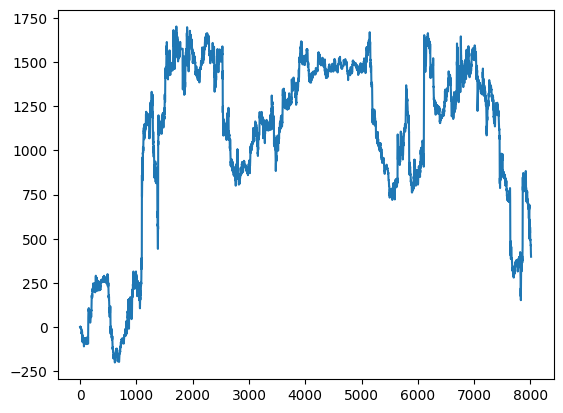

In [206]:
plt.plot(np.cumsum(pnl))
plt.show()